<a href="https://colab.research.google.com/github/DanielaNavaGarcia/Simulacion-I/blob/main/Prueba_K_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba Kolmogorov-Smirnov
El procedimiento Prueba de Kolmogorov-Smirnov para una muestra compara la función de distribución acumulada observada de una variable con una distribución teórica determinada, que puede ser la normal, la uniforme, la de Poisson o la exponencial. La Z de Kolmogorov-Smirnov se calcula a partir de la diferencia mayor (en valor absoluto) entre las funciones de distribución acumuladas teórica y observada. Esta prueba de bondad de ajuste contrasta si las observaciones podrían razonablemente proceder de la distribución especificada.

Estadístico KS: 0.03565
P-valor: 0.15355
No se rechaza la hipótesis nula: la muestra puede provenir de una distribución uniforme.


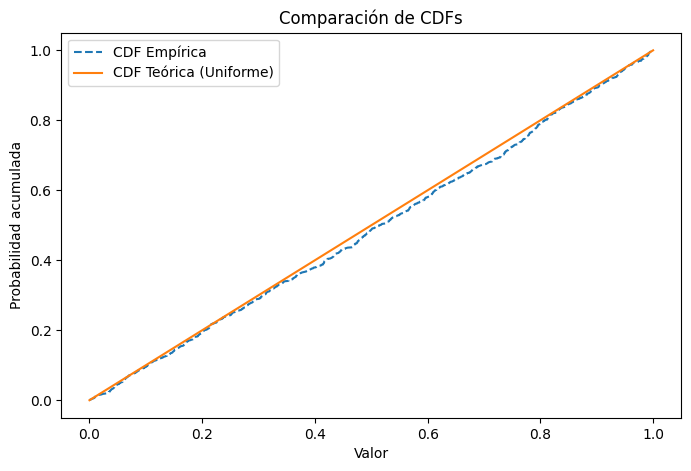

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def kolmogorov_smirnov_test(sample, cdf):

    ks_stat, p_value = stats.ks_1samp(sample, cdf)
    return ks_stat, p_value

# Generar una muestra de números aleatorios uniformes
tamaño_muestra = 1000
muestra = np.random.uniform(0, 1, tamaño_muestra)

# Realizar la prueba de Kolmogorov-Smirnov comparando con la distribución uniforme
test_stat, p_val = kolmogorov_smirnov_test(muestra, stats.uniform.cdf)

# Mostrar resultados
print(f"Estadístico KS: {test_stat:.5f}")
print(f"P-valor: {p_val:.5f}")

# Interpretación
a_nivel = 0.05
if p_val < a_nivel:
    print("Rechazamos la hipótesis nula: la muestra no sigue la distribución uniforme.")
else:
    print("No se rechaza la hipótesis nula: la muestra puede provenir de una distribución uniforme.")

# Visualización de la CDF empírica y teórica
x = np.sort(muestra)
y_empirica = np.arange(1, tamaño_muestra + 1) / tamaño_muestra
y_teorica = stats.uniform.cdf(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_empirica, label="CDF Empírica", linestyle="--")
plt.plot(x, y_teorica, label="CDF Teórica (Uniforme)", linestyle="-")
plt.xlabel("Valor")
plt.ylabel("Probabilidad acumulada")
plt.title("Comparación de CDFs")
plt.legend()
plt.show()
